# Webscraping and data preprocessing

In [ ]:
import pandas as pd

Which data seasons do you want?

In [ ]:
urls = ['https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

In [ ]:
df_list = []

for url in urls:
    df_list.append(pd.read_html(url,index_col=False)[0])
    df = pd.concat(df_list, axis=0, ignore_index=True)

In [ ]:
# remove na values
df = df[df['Wk'].notna()]

In [ ]:
df = df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway',
                   'Wk':'Week'})

In [ ]:
df['HomeScore'] = df['Score'].str[0]
df['AwayScore'] = df['Score'].str[2]

In [ ]:
df = df.drop(['Match Report','Notes'],axis=1)

In [ ]:
#convert to date
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.sort_values(by='Date', inplace=True)

In [ ]:
df = df[['Week','Date','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]
df = df.dropna()
df[['Week','Attendance']] = df[['Week','Attendance']].astype(int)
df[['HomeScore','AwayScore']] = df[['HomeScore','AwayScore']].astype(float)


In [ ]:
df.head()

,Week,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
2156,1,2017-08-11,Arsenal,4.0,2.5,3.0,1.5,Leicester City,59387,Emirates Stadium,Mike Dean
2163,1,2017-08-12,Brighton,0.0,0.3,2.0,1.9,Manchester City,30415,The American Express Community Stadium,Michael Oliver
2157,1,2017-08-12,Watford,3.0,2.1,3.0,2.6,Liverpool,20407,Vicarage Road Stadium,Anthony Taylor
2158,1,2017-08-12,Crystal Palace,0.0,1.1,3.0,1.5,Huddersfield,25448,Selhurst Park,Jonathan Moss
2159,1,2017-08-12,West Brom,1.0,1.3,0.0,0.5,Bournemouth,25011,The Hawthorns,Robert Madley


# Naive Bayes model to predich team which team wins the match

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#ML libs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
df = df.reset_index()

#Home — 1
#Away — 2
#Draw — 0

results = []
result = 0
for i in range(len(df)):
  if df.HomeScore[i] > df.AwayScore[i]:
     result = 1
     results.append(result)
  elif df.HomeScore[i] < df.AwayScore[i]:
     result = 2
     results.append(result)
  else:
     result = 0
     results.append(result)
df['result'] = results

In [ ]:
df.head()

,index,Week,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee,result
0,2156,1,2017-08-11,Arsenal,4.0,2.5,3.0,1.5,Leicester City,59387,Emirates Stadium,Mike Dean,1
1,2163,1,2017-08-12,Brighton,0.0,0.3,2.0,1.9,Manchester City,30415,The American Express Community Stadium,Michael Oliver,2
2,2157,1,2017-08-12,Watford,3.0,2.1,3.0,2.6,Liverpool,20407,Vicarage Road Stadium,Anthony Taylor,0
3,2158,1,2017-08-12,Crystal Palace,0.0,1.1,3.0,1.5,Huddersfield,25448,Selhurst Park,Jonathan Moss,2
4,2159,1,2017-08-12,West Brom,1.0,1.3,0.0,0.5,Bournemouth,25011,The Hawthorns,Robert Madley,1


In [ ]:
df.to_excel('league_match_data.xlsx')

In [ ]:
unique_clubs = list(df['Home'].unique())

In [ ]:
unique_clubs

['Arsenal',
 'Brighton',
 'Watford',
 'Crystal Palace',
 'West Brom',
 'Chelsea',
 'Everton',
 'Southampton',
 'Newcastle Utd',
 'Manchester Utd',
 'Stoke City',
 'Liverpool',
 'Leicester City',
 'Bournemouth',
 'Swansea City',
 'Burnley',
 'Huddersfield',
 'Tottenham',
 'Manchester City',
 'West Ham',
 'Fulham',
 'Wolves',
 'Cardiff City',
 'Norwich City',
 'Aston Villa',
 'Sheffield Utd',
 'Leeds United',
 'Brentford',
 "Nott'ham Forest"]

In [ ]:
df1 = df.copy()

In [ ]:
for i in range(len(unique_clubs)):
  df.replace({unique_clubs[i]:i+1}, inplace=True)

In [ ]:
df.head()

,index,Week,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee,result
0,2156,1,2017-08-11,1,4.0,2.5,3.0,1.5,13,59387,Emirates Stadium,Mike Dean,1
1,2163,1,2017-08-12,2,0.0,0.3,2.0,1.9,19,30415,The American Express Community Stadium,Michael Oliver,2
2,2157,1,2017-08-12,3,3.0,2.1,3.0,2.6,12,20407,Vicarage Road Stadium,Anthony Taylor,0
3,2158,1,2017-08-12,4,0.0,1.1,3.0,1.5,17,25448,Selhurst Park,Jonathan Moss,2
4,2159,1,2017-08-12,5,1.0,1.3,0.0,0.5,14,25011,The Hawthorns,Robert Madley,1


In [ ]:
df = df.drop(columns=['index','Date','Venue','Referee'])

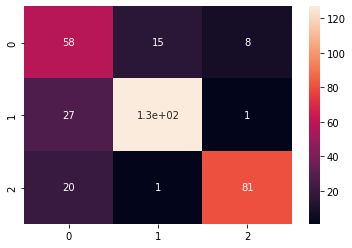

In [ ]:
X = df.drop(['result'],axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf, annot=True)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.72      0.62        81
           1       0.89      0.82      0.85       155
           2       0.90      0.79      0.84       102

    accuracy                           0.79       338
   macro avg       0.78      0.78      0.77       338
weighted avg       0.81      0.79      0.79       338



# Attendance and xG

In [ ]:
df1.head()

,index,Week,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee,result
0,2156,1,2017-08-11,Arsenal,4.0,2.5,3.0,1.5,Leicester City,59387,Emirates Stadium,Mike Dean,1
1,2163,1,2017-08-12,Brighton,0.0,0.3,2.0,1.9,Manchester City,30415,The American Express Community Stadium,Michael Oliver,2
2,2157,1,2017-08-12,Watford,3.0,2.1,3.0,2.6,Liverpool,20407,Vicarage Road Stadium,Anthony Taylor,0
3,2158,1,2017-08-12,Crystal Palace,0.0,1.1,3.0,1.5,Huddersfield,25448,Selhurst Park,Jonathan Moss,2
4,2159,1,2017-08-12,West Brom,1.0,1.3,0.0,0.5,Bournemouth,25011,The Hawthorns,Robert Madley,1


In [ ]:
df1['Home diff'] = df1['HomeScore'] - df1['xGHome']
df1['Away diff'] = df1['AwayScore'] - df1['xGAway']

In [ ]:
df_groupby_home = df1[['HomeScore','xGHome','AwayScore','xGAway','Attendance','Home','Home diff','Away diff']].groupby(['Home']).mean()

In [ ]:
df_groupby_away = df1[['HomeScore','xGHome','AwayScore','xGAway','Away','Home diff','Away diff']].groupby(['Away']).mean()

In [ ]:
df_groupby_away

,HomeScore,xGHome,AwayScore,xGAway,Attendance,Home diff,Away diff
Away,,,,,,,
Arsenal,1.488095,1.390476,1.404762,1.302381,37397.916667,0.097619,0.102381
Aston Villa,1.673913,1.632609,1.086957,1.047826,37480.630435,0.041304,0.039130
Bournemouth,2.093750,1.768750,1.031250,1.003125,39724.343750,0.325000,0.028125
Brentford,1.800000,1.433333,1.300000,1.140000,39380.166667,0.366667,0.160000
Brighton,1.511905,1.494048,1.023810,1.007143,39133.452381,0.017857,0.016667
Burnley,1.479452,1.576712,0.986301,0.923288,38120.000000,-0.097260,0.063014
Cardiff City,1.631579,1.884211,0.684211,0.926316,37789.947368,-0.252632,-0.242105
Chelsea,1.200000,1.080000,1.588235,1.414118,37990.847059,0.120000,0.174118
Crystal Palace,1.469880,1.461446,1.132530,0.987952,39572.361446,0.008434,0.144578


In [ ]:
df_groupby_home = df_groupby_home.reset_index()
df_groupby_home

,Home,HomeScore,xGHome,AwayScore,xGAway,Attendance,Home diff,Away diff
0,Arsenal,2.188235,1.930588,1.035294,1.140000,58554.600000,0.257647,-0.104706
1,Aston Villa,1.511111,1.313333,1.622222,1.602222,40966.400000,0.197778,0.020000
2,Bournemouth,1.333333,1.252381,1.396825,1.395238,10527.460317,0.080952,0.001587
3,Brentford,1.483871,1.422581,1.032258,1.119355,16980.741935,0.061290,-0.087097
4,Brighton,1.190476,1.310714,1.261905,1.150000,30065.880952,-0.120238,0.111905
5,Burnley,1.068493,1.249315,1.315068,1.352055,19956.178082,-0.180822,-0.036986
6,Cardiff City,1.105263,1.289474,2.000000,1.347368,31407.947368,-0.184211,0.652632
7,Chelsea,1.717647,1.718824,0.882353,0.851765,38861.552941,-0.001176,0.030588
8,Crystal Palace,1.174419,1.387209,1.174419,1.147674,24512.360465,-0.212791,0.026744
9,Everton,1.376471,1.308235,1.141176,1.175294,38061.152941,0.068235,-0.034118


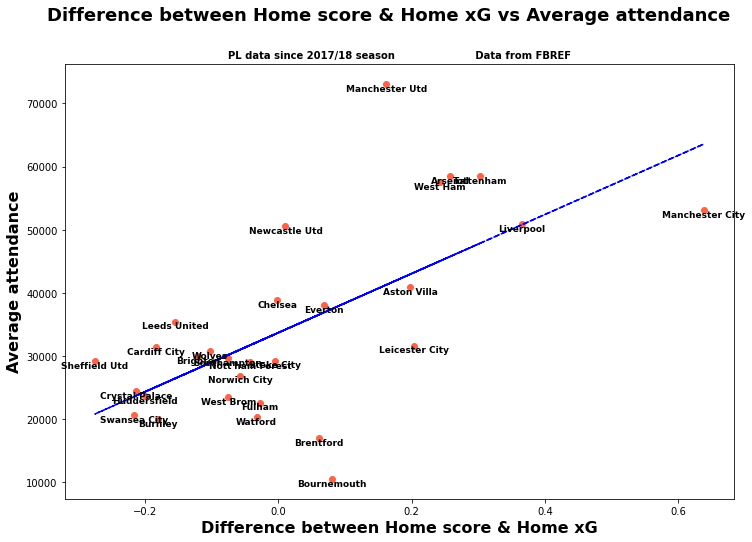

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = df_groupby_home['Home diff']
y = df_groupby_home['Attendance']
nomes = df_groupby_home['Home'].tolist()

plt.figure(figsize=(12, 8))

plt.scatter(x, y,color='tomato')

plt.suptitle('Difference between Home score & Home xG vs Average attendance', fontsize=18, fontweight='bold')
plt.xlabel('Difference between Home score & Home xG', fontsize=16, fontweight='bold')
plt.ylabel('Average attendance', fontsize=16, fontweight='bold')
plt.title('PL data since 2017/18 season                       Data from FBREF', fontsize=10, fontweight='bold')

for i, nome in enumerate(nomes):
    plt.text(x[i], y[i], nome, fontsize=9,fontweight='bold', horizontalalignment='center', verticalalignment='top')

p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), '--b')

plt.savefig('grafico.png', dpi=300)


In [ ]:
df_groupby_home[['Attendance','HomeScore','AwayScore','Home diff','Away diff','xGHome','xGAway']].corr()['Attendance']

Attendance    1.000000
HomeScore     0.661966
AwayScore    -0.440358
Home diff     0.647583
Away diff    -0.190467
xGHome        0.604247
xGAway       -0.481215
Name: Attendance, dtype: float64

#Referees study

In [ ]:
df_refs_result = df1[['Referee','result','Home']].groupby(['Referee','result']).count()

In [ ]:
df_refs_result

Home
Referee         result      
Andre Marriner  0         22
                1         38
                2         40
Andy Madley     0         13
                1         23
...                      ...
Thomas Bramall  2          1
Tim Robinson    1          1
Tony Harrington 0          2
                1          5
                2          2

[91 rows x 1 columns]

In [ ]:
df_refs_result.reset_index(inplace=True)

In [ ]:
df_refs_games = df_refs_result.groupby('Referee').sum()

In [ ]:
df_refs_games.reset_index(inplace=True)

In [ ]:
df_refs_result = pd.merge(df_refs_result,df_refs_games[['Referee','Home']],on='Referee')

In [ ]:
df_refs_result

,Referee,result,Home_x,Home_y
0,Andre Marriner,0,22,100
1,Andre Marriner,1,38,100
2,Andre Marriner,2,40,100
3,Andy Madley,0,13,46
4,Andy Madley,1,23,46
...,...,...,...,...
86,Thomas Bramall,2,1,5
87,Tim Robinson,1,1,1
88,Tony Harrington,0,2,9
89,Tony Harrington,1,5,9


In [ ]:
df_refs_result['%'] = df_refs_result['Home_x']*100/df_refs_result['Home_y']
df_refs_result = df_refs_result[df_refs_result['Home_y'] > 20]

In [ ]:
df_refs_result = df_refs_result.drop(columns=['Home_y'])

In [ ]:
df_refs_result[df_refs_result['result']==0].sort_values(by='%',ascending=False)

,Referee,result,Home_x,%
66,Peter Bankes,0,12,37.500000
75,Roger East,0,9,32.142857
3,Andy Madley,0,13,28.260870
41,Lee Probert,0,9,28.125000
78,Simon Hooper,0,14,28.000000
81,Stuart Attwell,0,23,26.436782
38,Lee Mason,0,13,25.490196
53,Mike Dean,0,26,25.000000
35,Kevin Friend,0,22,24.444444
20,David Coote,0,14,24.137931


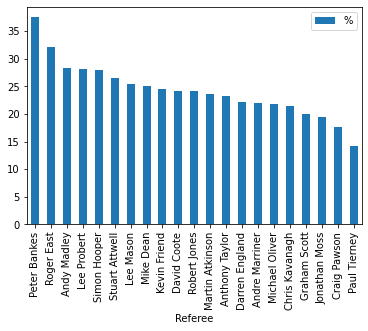

In [ ]:
df_refs_result[df_refs_result['result']==0].sort_values(by='%',ascending=False).plot.bar(x='Referee', y='%')

In [ ]:
df_refs_scores = df1[['Referee','HomeScore','Home','AwayScore']].groupby(['Referee']).mean().round(2)
df_refs_scores['diff'] = df_refs_scores['HomeScore'] - df_refs_scores['AwayScore']
df_refs_scores.sort_values(by='diff', ascending=False)

,HomeScore,AwayScore,diff
Referee,,,
Mike Jones,1.75,0.67,1.08
Michael Salisbury,1.92,0.85,1.07
Darren Bond,1.50,0.50,1.00
Tim Robinson,1.00,0.00,1.00
Roger East,1.82,1.00,0.82
Stuart Attwell,1.80,1.17,0.63
Andy Madley,1.72,1.09,0.63
Graham Scott,1.74,1.14,0.60
Tony Harrington,1.67,1.11,0.56


# Expected Points computation

In [ ]:
df2 = df1.copy()

In [ ]:
df2['xG_differential'] = df2['xGHome'] - df2['xGAway']

In [ ]:
for idx, row in df.iterrows():
    if df2.loc[idx,'xG_differential']>1.5:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 2.7,0.3
    elif df2.loc[idx,'xG_differential']>1.0 and df2.loc[idx,'xG_differential'] < 1.5:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 2.3,0.7

    elif df2.loc[idx,'xG_differential']>0.5 and df2.loc[idx,'xG_differential'] < 1.0:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 2.0,1.0

    elif df2.loc[idx,'xG_differential']>0 and df2.loc[idx,'xG_differential'] < 0.5:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 1.5,1.5

    elif df2.loc[idx,'xG_differential']>-0.5 and df2.loc[idx,'xG_differential'] < 0:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 0.7,2.3

    elif df2.loc[idx,'xG_differential']>-1.0 and df2.loc[idx,'xG_differential'] < -0.5:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 0.5,2.5

    elif df2.loc[idx,'xG_differential']>-1.5 and df2.loc[idx,'xG_differential'] < -1.0:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 0.3,2.7

    else:
        df2.loc[idx,'home_xP'],df2.loc[idx,'away_xP'] = 0.1,2.9

In [ ]:
df2

,index,Week,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee,result,Home diff,Away diff,xG_differential,home_xP,away_xP
0,2156,1,2017-08-11,Arsenal,4.0,2.5,3.0,1.5,Leicester City,59387,Emirates Stadium,Mike Dean,1,1.5,1.5,1.0,0.1,2.9
1,2163,1,2017-08-12,Brighton,0.0,0.3,2.0,1.9,Manchester City,30415,The American Express Community Stadium,Michael Oliver,2,-0.3,0.1,-1.6,0.1,2.9
2,2157,1,2017-08-12,Watford,3.0,2.1,3.0,2.6,Liverpool,20407,Vicarage Road Stadium,Anthony Taylor,0,0.9,0.4,-0.5,0.1,2.9
3,2158,1,2017-08-12,Crystal Palace,0.0,1.1,3.0,1.5,Huddersfield,25448,Selhurst Park,Jonathan Moss,2,-1.1,1.5,-0.4,0.7,2.3
4,2159,1,2017-08-12,West Brom,1.0,1.3,0.0,0.5,Bournemouth,25011,The Hawthorns,Robert Madley,1,-0.3,-0.5,0.8,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,257,24,2023-02-18,Everton,1.0,1.4,0.0,0.5,Leeds United,39232,Goodison Park,Andy Madley,1,-0.4,-0.5,0.9,2.0,1.0
1683,254,24,2023-02-18,Brighton,0.0,2.2,1.0,0.3,Fulham,31619,The American Express Community Stadium,Darren England,2,-2.2,0.7,1.9,2.7,0.3
1684,253,24,2023-02-18,Aston Villa,2.0,0.5,4.0,3.0,Arsenal,42066,Villa Park,Simon Hooper,2,1.5,1.0,-2.5,0.1,2.9
1685,255,24,2023-02-18,Nott'ham Forest,1.0,1.0,1.0,2.5,Manchester City,29365,The City Ground,Graham Scott,0,0.0,-1.5,-1.5,0.1,2.9


In [ ]:
homes = df2['Home'].unique()

result = pd.DataFrame({
    'Home': homes
})

for home in homes:
    filtered_df = df2[df2['Home'] == home]
    total_xP = filtered_df['home_xP'].sum() if home in filtered_df['Home'].values else filtered_df['away_xP'].sum()
    result.loc[result['Home'] == home, 'Total_xP'] = total_xP

# Expected Points Table

In [ ]:
result.sort_values(by='Total_xP',ascending=False)

,Home,Total_xP
18,Manchester City,178.3
11,Liverpool,173.3
5,Chelsea,147.9
0,Arsenal,142.4
9,Manchester Utd,123.1
17,Tottenham,122.0
3,Crystal Palace,116.8
12,Leicester City,99.6
1,Brighton,98.3
6,Everton,93.5
